<a href="https://colab.research.google.com/github/Gandharva-Thotla/Gandharva-Thotla/blob/main/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: House Sales in King County, USA**

**Table of Contents**


**Instructions
About the Dataset**

Module 1: Importing Data

Module 2: Data Wrangling

Module 3: Exploratory Data Analysis

Module 4: Model Development

Module 5: Model Evaluation and Refinement

# **About the Dataset**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. It was also slightly modified for the purposes of this course.

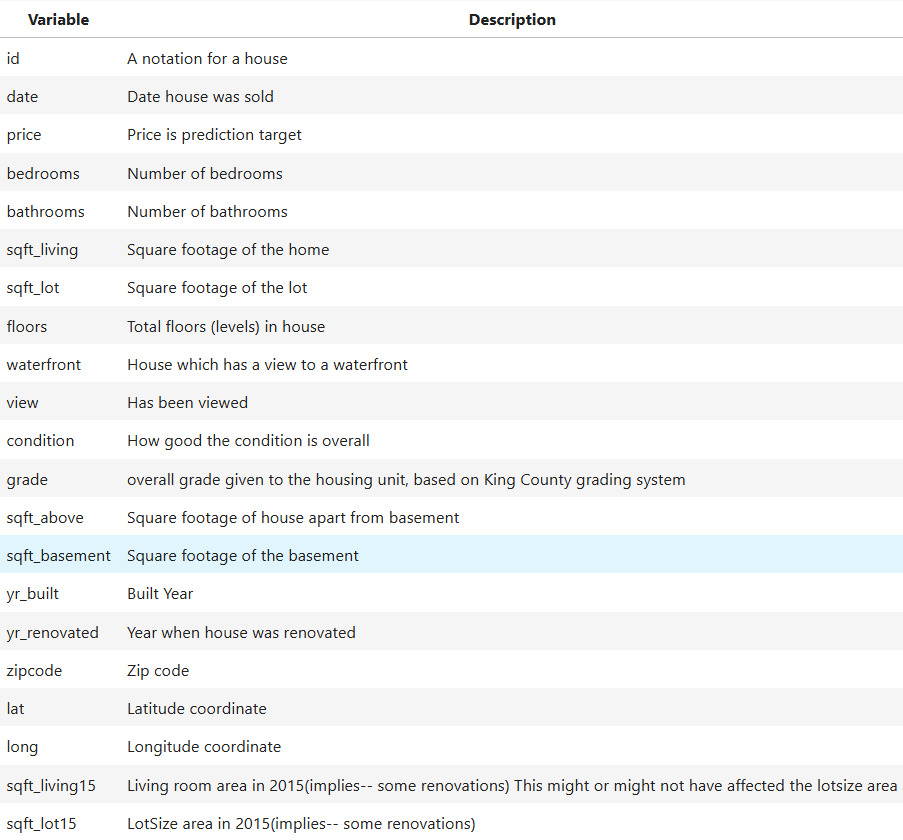

# **Module 1: Importing Data Sets**

In [14]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Set up plotting style
%matplotlib inline
plt.style.use('seaborn-v0_8')
print("All libraries imported successfully!")

All libraries imported successfully!


In [15]:
# Download the dataset directly
import urllib.request
import os

# Create data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Download the file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
file_path = '/content/kc_house_data_NaN.csv'

urllib.request.urlretrieve(url, file_path)

# Load the data
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (21613, 22)


**Question 1: Display the data types of each column using the function dtypes.**

In [16]:
# Question 1 - Display data types
print("=== QUESTION 1: Data Types ===")
print(df.dtypes)

=== QUESTION 1: Data Types ===
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# **MODULE 2: Data Wrangling**

**Question 2: Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True.**

In [17]:
# Question 2 - Drop columns and get statistical summary
print("=== QUESTION 2: Data Cleaning ===")

# Make a copy to preserve original data
df_clean = df.copy()

# Drop unnecessary columns
df_clean.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Display statistical summary
print("Statistical Summary after dropping columns:")
display(df_clean.describe())

=== QUESTION 2: Data Cleaning ===
Statistical Summary after dropping columns:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Handle Missing Values:**

In [18]:
# Handle missing values for bedrooms and bathrooms
print("=== Handling Missing Values ===")

print("Before handling missing values:")
print(f"NaN values in bedrooms: {df_clean['bedrooms'].isnull().sum()}")
print(f"NaN values in bathrooms: {df_clean['bathrooms'].isnull().sum()}")

# Replace missing values with mean
bedrooms_mean = df_clean['bedrooms'].mean()
bathrooms_mean = df_clean['bathrooms'].mean()

df_clean['bedrooms'].fillna(bedrooms_mean, inplace=True)
df_clean['bathrooms'].fillna(bathrooms_mean, inplace=True)

print("\nAfter handling missing values:")
print(f"NaN values in bedrooms: {df_clean['bedrooms'].isnull().sum()}")
print(f"NaN values in bathrooms: {df_clean['bathrooms'].isnull().sum()}")

=== Handling Missing Values ===
Before handling missing values:
NaN values in bedrooms: 13
NaN values in bathrooms: 10

After handling missing values:
NaN values in bedrooms: 0
NaN values in bathrooms: 0


/tmp/ipython-input-1426107097.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bedrooms'].fillna(bedrooms_mean, inplace=True)
/tmp/ipython-input-1426107097.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

# **MODULE 3: Exploratory Data Analysis**

**Question 3: Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame.**

In [19]:
# Question 3 - Unique floor values
print("=== QUESTION 3: Unique Floor Values ===")
floor_counts = df_clean['floors'].value_counts().to_frame()
floor_counts.columns = ['count']  # Rename column for clarity
print("Houses with unique floor values:")
display(floor_counts)

=== QUESTION 3: Unique Floor Values ===
Houses with unique floor values:


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


**Question 4: Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.**

=== QUESTION 4: Waterfront vs Price Outliers ===


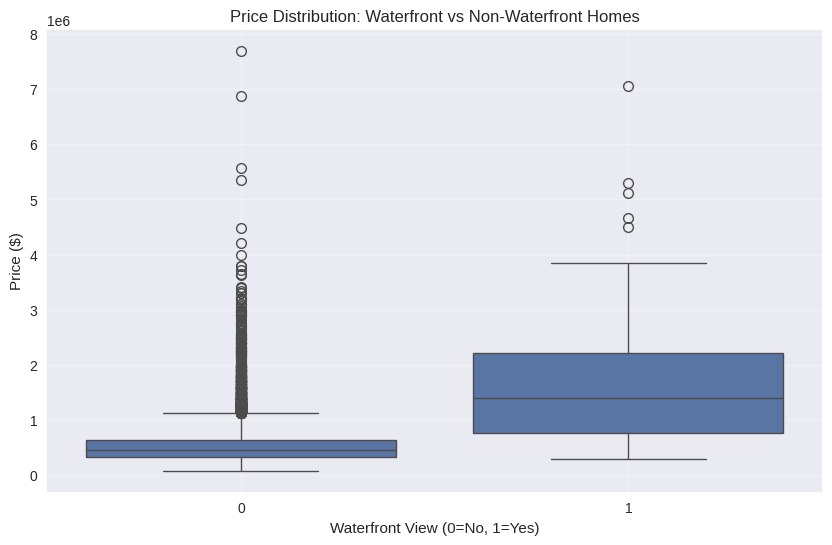

Observation: Homes with waterfront view (1) have higher prices and more outliers.


In [20]:
# Question 4 - Waterfront vs Price Boxplot
print("=== QUESTION 4: Waterfront vs Price Outliers ===")

plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df_clean)
plt.title('Price Distribution: Waterfront vs Non-Waterfront Homes')
plt.xlabel('Waterfront View (0=No, 1=Yes)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

print("Observation: Homes with waterfront view (1) have higher prices and more outliers.")

**Question 5: Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.**

=== QUESTION 5: Sqft Above vs Price Correlation ===


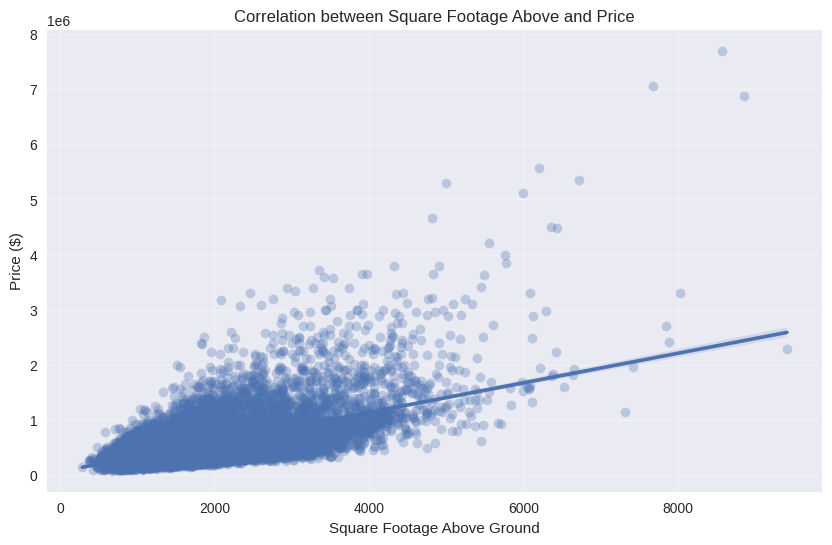


Top 5 features most correlated with price:


,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525738


In [21]:
# Question 5 - Sqft Above vs Price Correlation
print("=== QUESTION 5: Sqft Above vs Price Correlation ===")

plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df_clean, scatter_kws={'alpha':0.3})
plt.title('Correlation between Square Footage Above and Price')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Find most correlated features with price
print("\nTop 5 features most correlated with price:")
numeric_df = df_clean.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['price'].sort_values(ascending=False)
display(correlations.head(6))  # Show top 6 (including price itself)

#**MODULE 4: Model Development**

**Question 6: Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.**

In [22]:
# Question 6 - Simple Linear Regression with sqft_living
print("=== QUESTION 6: Simple Linear Regression ===")

X_simple = df_clean[['sqft_living']]
y = df_clean['price']

lm_simple = LinearRegression()
lm_simple.fit(X_simple, y)

r2_simple = lm_simple.score(X_simple, y)
print(f"R-squared using only 'sqft_living': {r2_simple:.4f}")

=== QUESTION 6: Simple Linear Regression ===
R-squared using only 'sqft_living': 0.4929


**Question 7: Fit a linear regression model to predict the 'price' using the list of features:**

In [23]:
# Question 7 - Multiple Linear Regression
print("=== QUESTION 7: Multiple Linear Regression ===")

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X_multi = df_clean[features]
y = df_clean['price']

lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)

r2_multi = lm_multi.score(X_multi, y)
print(f"R-squared using multiple features: {r2_multi:.4f}")
print(f"Number of features used: {len(features)}")

=== QUESTION 7: Multiple Linear Regression ===
R-squared using multiple features: 0.6577
Number of features used: 11


**Question 8: Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.**

This will help with Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [24]:
# Question 8 - Pipeline with Scaling and Polynomial Features
print("=== QUESTION 8: Pipeline with Polynomial Features ===")

# Create pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
    ('model', LinearRegression())
])

# Fit pipeline
pipeline.fit(X_multi, y)

r2_pipeline = pipeline.score(X_multi, y)
print(f"R-squared using pipeline with polynomial features: {r2_pipeline:.4f}")

=== QUESTION 8: Pipeline with Polynomial Features ===
R-squared using pipeline with polynomial features: 0.7513


#**MODULE 5: Model Evaluation and Refinement**

**Question 9: Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.**

In [25]:
# Question 9 - Ridge Regression
print("=== QUESTION 9: Ridge Regression ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.15, random_state=1)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Fit Ridge regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

r2_ridge = ridge_model.score(X_test, y_test)
print(f"R-squared using Ridge regression (alpha=0.1): {r2_ridge:.4f}")

=== QUESTION 9: Ridge Regression ===
Training samples: 18371
Testing samples: 3242
R-squared using Ridge regression (alpha=0.1): 0.6479


**Question 10: Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.**

In [26]:
# Question 10 - Polynomial Transform with Ridge Regression
print("=== QUESTION 10: Polynomial + Ridge Regression ===")

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression on polynomial features
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print(f"R-squared using Polynomial + Ridge regression: {r2_ridge_poly:.4f}")

# Compare all models
print("\n=== MODEL COMPARISON ===")
print(f"Simple Linear Regression: {r2_simple:.4f}")
print(f"Multiple Linear Regression: {r2_multi:.4f}")
print(f"Pipeline with Polynomial: {r2_pipeline:.4f}")
print(f"Ridge Regression: {r2_ridge:.4f}")
print(f"Polynomial + Ridge: {r2_ridge_poly:.4f}")

=== QUESTION 10: Polynomial + Ridge Regression ===
R-squared using Polynomial + Ridge regression: 0.7003

=== MODEL COMPARISON ===
Simple Linear Regression: 0.4929
Multiple Linear Regression: 0.6577
Pipeline with Polynomial: 0.7513
Ridge Regression: 0.6479
Polynomial + Ridge: 0.7003
